In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(0)
import copy

### ニュースキュレーションアプリのサンプルデータを扱ってみましょう

In [2]:
raw_data = pd.read_csv('data/news_curation_data.csv')
data = raw_data.copy()

In [4]:
data.shape

(11000, 15)

In [5]:
data.head(5)

,年代,性別,平日：00:00-06:00,平日：06:00-12:00,平日：12:00-18:00,平日：18:00-24:00,週末：00:00-06:00,週末：06:00-12:00,週末：12:00-18:00,週末：18:00-24:00,テクノロジー,経済・政治,エンタメ,国際,アニメ
0,30,女性,1,1,10,0,1,1,1,1,1,1,7,1,1
1,30,女性,12,1,1,1,1,1,5,0,3,1,1,1,11
2,40,女性,1,5,1,1,1,5,1,1,1,3,1,4,1
3,20,女性,10,1,1,1,1,0,5,1,2,1,1,1,10
4,30,女性,1,1,12,1,0,1,1,1,1,1,7,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
年代                11000 non-null int64
性別                11000 non-null object
平日：00:00-06:00    11000 non-null int64
平日：06:00-12:00    11000 non-null int64
平日：12:00-18:00    11000 non-null int64
平日：18:00-24:00    11000 non-null int64
週末：00:00-06:00    11000 non-null int64
週末：06:00-12:00    11000 non-null int64
週末：12:00-18:00    11000 non-null int64
週末：18:00-24:00    11000 non-null int64
テクノロジー            11000 non-null int64
経済・政治             11000 non-null int64
エンタメ              11000 non-null int64
国際                11000 non-null int64
アニメ               11000 non-null int64
dtypes: int64(14), object(1)
memory usage: 1.3+ MB


In [7]:
data.describe()

,年代,平日：00:00-06:00,平日：06:00-12:00,平日：12:00-18:00,平日：18:00-24:00,週末：00:00-06:00,週末：06:00-12:00,週末：12:00-18:00,週末：18:00-24:00,テクノロジー,経済・政治,エンタメ,国際,アニメ
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,26.922727,4.417545,3.317091,3.108727,0.943182,0.948636,1.148545,2.589091,0.945909,1.636818,3.398909,2.662091,1.269091,3.109273
std,8.221933,4.653414,4.028605,4.021693,0.248550,0.240461,0.978414,2.227384,0.244740,0.856357,3.447469,3.214673,0.788792,4.033213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,30.000000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,2.000000,6.000000,1.000000,1.000000,1.000000
max,60.000000,14.000000,14.000000,14.000000,2.000000,2.000000,7.000000,7.000000,2.000000,3.000000,14.000000,12.000000,5.000000,14.000000


In [8]:
# 性別、年代をダミー変数にする
data = pd.get_dummies(data, drop_first=True, columns=['性別'])
data = pd.get_dummies(data, drop_first=True, columns=['年代'])

In [9]:
data.head()

,平日：00:00-06:00,平日：06:00-12:00,平日：12:00-18:00,平日：18:00-24:00,週末：00:00-06:00,週末：06:00-12:00,週末：12:00-18:00,週末：18:00-24:00,テクノロジー,経済・政治,エンタメ,国際,アニメ,性別_男性,年代_10,年代_20,年代_30,年代_40,年代_50,年代_60
0,1,1,10,0,1,1,1,1,1,1,7,1,1,0,0,0,1,0,0,0
1,12,1,1,1,1,1,5,0,3,1,1,1,11,0,0,0,1,0,0,0
2,1,5,1,1,1,5,1,1,1,3,1,4,1,0,0,0,0,1,0,0
3,10,1,1,1,1,0,5,1,2,1,1,1,10,0,0,1,0,0,0,0
4,1,1,12,1,0,1,1,1,1,1,7,1,1,0,0,0,1,0,0,0


## scikit-learnを使ったKMeansライブラリを使用してみましょう

In [10]:
# Kmeansでクラスターラベルを付与します
from sklearn.cluster import KMeans

# モデルを初期化
km =KMeans(n_clusters=3, random_state=1234)

# 学習は教師あり学習と同じように　model.fit(data)で実行します
km.fit(data)

# ラベルを付与する場合も教師あり学習同様に model.predict(data)で実行します
cluster_label = km.predict(data)

In [11]:
import copy

data_with_cluster_label = copy.copy(data)
data_with_cluster_label['cluster_label'] = cluster_label

In [12]:
# ラベルが付与されているか確認
data_with_cluster_label.head()

,平日：00:00-06:00,平日：06:00-12:00,平日：12:00-18:00,平日：18:00-24:00,週末：00:00-06:00,週末：06:00-12:00,週末：12:00-18:00,週末：18:00-24:00,テクノロジー,経済・政治,...,国際,アニメ,性別_男性,年代_10,年代_20,年代_30,年代_40,年代_50,年代_60,cluster_label
0,1,1,10,0,1,1,1,1,1,1,...,1,1,0,0,0,1,0,0,0,2
1,12,1,1,1,1,1,5,0,3,1,...,1,11,0,0,0,1,0,0,0,1
2,1,5,1,1,1,5,1,1,1,3,...,4,1,0,0,0,0,1,0,0,0
3,10,1,1,1,1,0,5,1,2,1,...,1,10,0,0,1,0,0,0,0,1
4,1,1,12,1,0,1,1,1,1,1,...,1,1,0,0,0,1,0,0,0,2


## ElbowMethodで最適なクラスター数を求めてみましょう

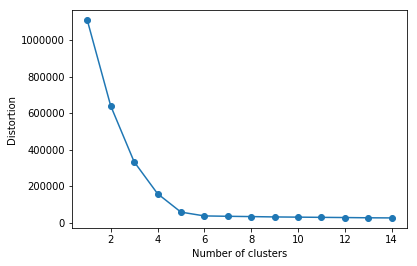

In [14]:
distortions = []

for i  in range(1,15):                # 1~15クラスタまで計算 
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(data)                       # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,15),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

どうやら、クラスタ数は4~5が良さそうです。 <br>
クラスタ数5で、再度クラスタリングしてみましょう

In [15]:
km =KMeans(n_clusters=5, random_state=1234)
km.fit(data)
cluster_label = km.predict(data)

In [16]:
data_with_cluster_label = copy.copy(data)
data_with_cluster_label['cluster_label'] = cluster_label

クラスター別にどんな傾向があるか解釈してみましょう

In [18]:
data_with_cluster_label.to_excel("data/kmeans_result.xlsx", index=False, encoding='cp932')